# [Income Classification Project]

- 1. Libraries and Data Loading
- 2. Nan Value and Value Checking
- 3. Data Category Handling
- 4. Check Correlation Beetween Independent and Dependent Feature
- 5. Visualization
- 6. Machine Learning Models
- 7. Model Evaluation
- 8. Model Selection

# Libraries and Data Loading

In [496]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

In [497]:
# https://www.kaggle.com/lodetomasi1995/income-classification
dfRaw = pd.read_csv("income_evaluation.csv", encoding ='iso-8859-9')
dfRaw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [498]:
dfRaw.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [499]:
lstColumn = []
def replace_space(lst):
    for i in lst:
        lstColumn.append(i.replace(' ',''))
    
replace_space(dfRaw.columns)

In [500]:
df= pd.DataFrame(dfRaw.values, columns=lstColumn)
dfr = dfRaw.copy()

In [501]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Nan Value and Value Checking

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null object
workclass         32561 non-null object
fnlwgt            32561 non-null object
education         32561 non-null object
education-num     32561 non-null object
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null object
capital-loss      32561 non-null object
hours-per-week    32561 non-null object
native-country    32561 non-null object
income            32561 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


In [503]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Change value columns which has a ' ?' value

In [504]:
lst = []

def changer(x):
    idx = []
    lstAmount = []
    for i in x:
        if ' ?' in df[i].unique():
            amount = df[df[i]==' ?'].index
            lst.append(i)
            lstAmount.append(f'{i} = {len(amount)}')
    
    return lstAmount
        
changer(df.columns)

['workclass = 1836', 'occupation = 1843', 'native-country = 583']

In [505]:
for i in lst:
    idx = df[df[i]==' ?'].index
    df[i].iloc[idx] = ' Other'
    dfr[" "+i].iloc[idx] = ' Other'

checking value columns which has a ' ?' value

In [506]:
lst = []
for i in df.columns:
    if ' ?' in df[i].unique():
        lst.append(i)
lst

[]

# Data Category Handling

In [507]:
dfRaw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [508]:
lstCategoryClmn = []
for i in df.columns:
    if " "+i not in dfRaw.describe().columns and i!='age' and i!='income':
        lstCategoryClmn.append(i)
        
lstCategoryClmn

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [509]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [510]:
def categoryHandling(x):
    lstCompare = []
    for i in x:
        for j in df[i].unique():
            idx = df[df[i] == j].index
            df[i].iloc[idx] = df[df[i] == j]['hours-per-week'].mean()
            dfr[" "+i].iloc[idx] = dfr[dfr[" "+i] == j][' hours-per-week'].mean()
        
        lstCompare.append(f'previously {len(dfRaw[" "+i].unique())} | {len(df[i].unique())} current')
        
            
    return lstCompare
 
categoryHandling(lstCategoryClmn)

['previously 9 | 9 current',
 'previously 16 | 16 current',
 'previously 7 | 7 current',
 'previously 15 | 15 current',
 'previously 6 | 6 current',
 'previously 5 | 5 current',
 'previously 2 | 2 current',
 'previously 42 | 42 current']

In [513]:
dfr[' income'].iloc[dfr[dfr[' income'] == ' <=50K'].index] = 0
dfr[' income'].iloc[dfr[dfr[' income'] == ' >50K'].index] = 1

df['income'].iloc[df[df['income'] == ' <=50K'].index] = 0
df['income'].iloc[df[df['income'] == ' >50K'].index] = 1

change object to int

In [514]:
# for i in lstCategoryClmn:
#     dfr[" "+i] = dfr[" "+i].astype(float)
#     df[i] = df[i].astype(float)

In [515]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,39.0316,77516,42.614,13,36.94,37.5584,40.5957,40.6891,42.4281,2174,0,40,40.4478,0
1,50,44.4219,83311,42.614,13,43.2849,44.9877,44.1201,40.6891,42.4281,0,0,13,40.4478,0
2,38,40.2671,215646,40.5754,9,41.2467,37.9474,40.5957,40.6891,42.4281,0,0,40,40.4478,0
3,53,40.2671,234721,33.926,7,43.2849,37.9474,44.1201,38.4229,42.4281,0,0,40,40.4478,0
4,28,40.2671,338409,42.614,13,43.2849,42.3867,36.8616,38.4229,36.4104,0,0,40,39.1579,0
5,37,40.2671,284582,43.8363,14,43.2849,44.9877,36.8616,40.6891,36.4104,0,0,40,40.4478,0
6,49,40.2671,160187,38.0447,5,39.6699,34.7017,40.5957,38.4229,36.4104,0,0,16,38.5926,0
7,52,44.4219,209642,40.5754,9,43.2849,44.9877,44.1201,40.6891,42.4281,0,0,45,40.4478,1
8,31,40.2671,45781,43.8363,14,36.94,42.3867,40.5957,40.6891,36.4104,14084,0,50,40.4478,1
9,42,40.2671,159449,42.614,13,43.2849,44.9877,44.1201,40.6891,42.4281,5178,0,40,40.4478,1


# Outlier Checking

In [516]:
dfr.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Text(0.5, 1.0, 'hours-per-week')

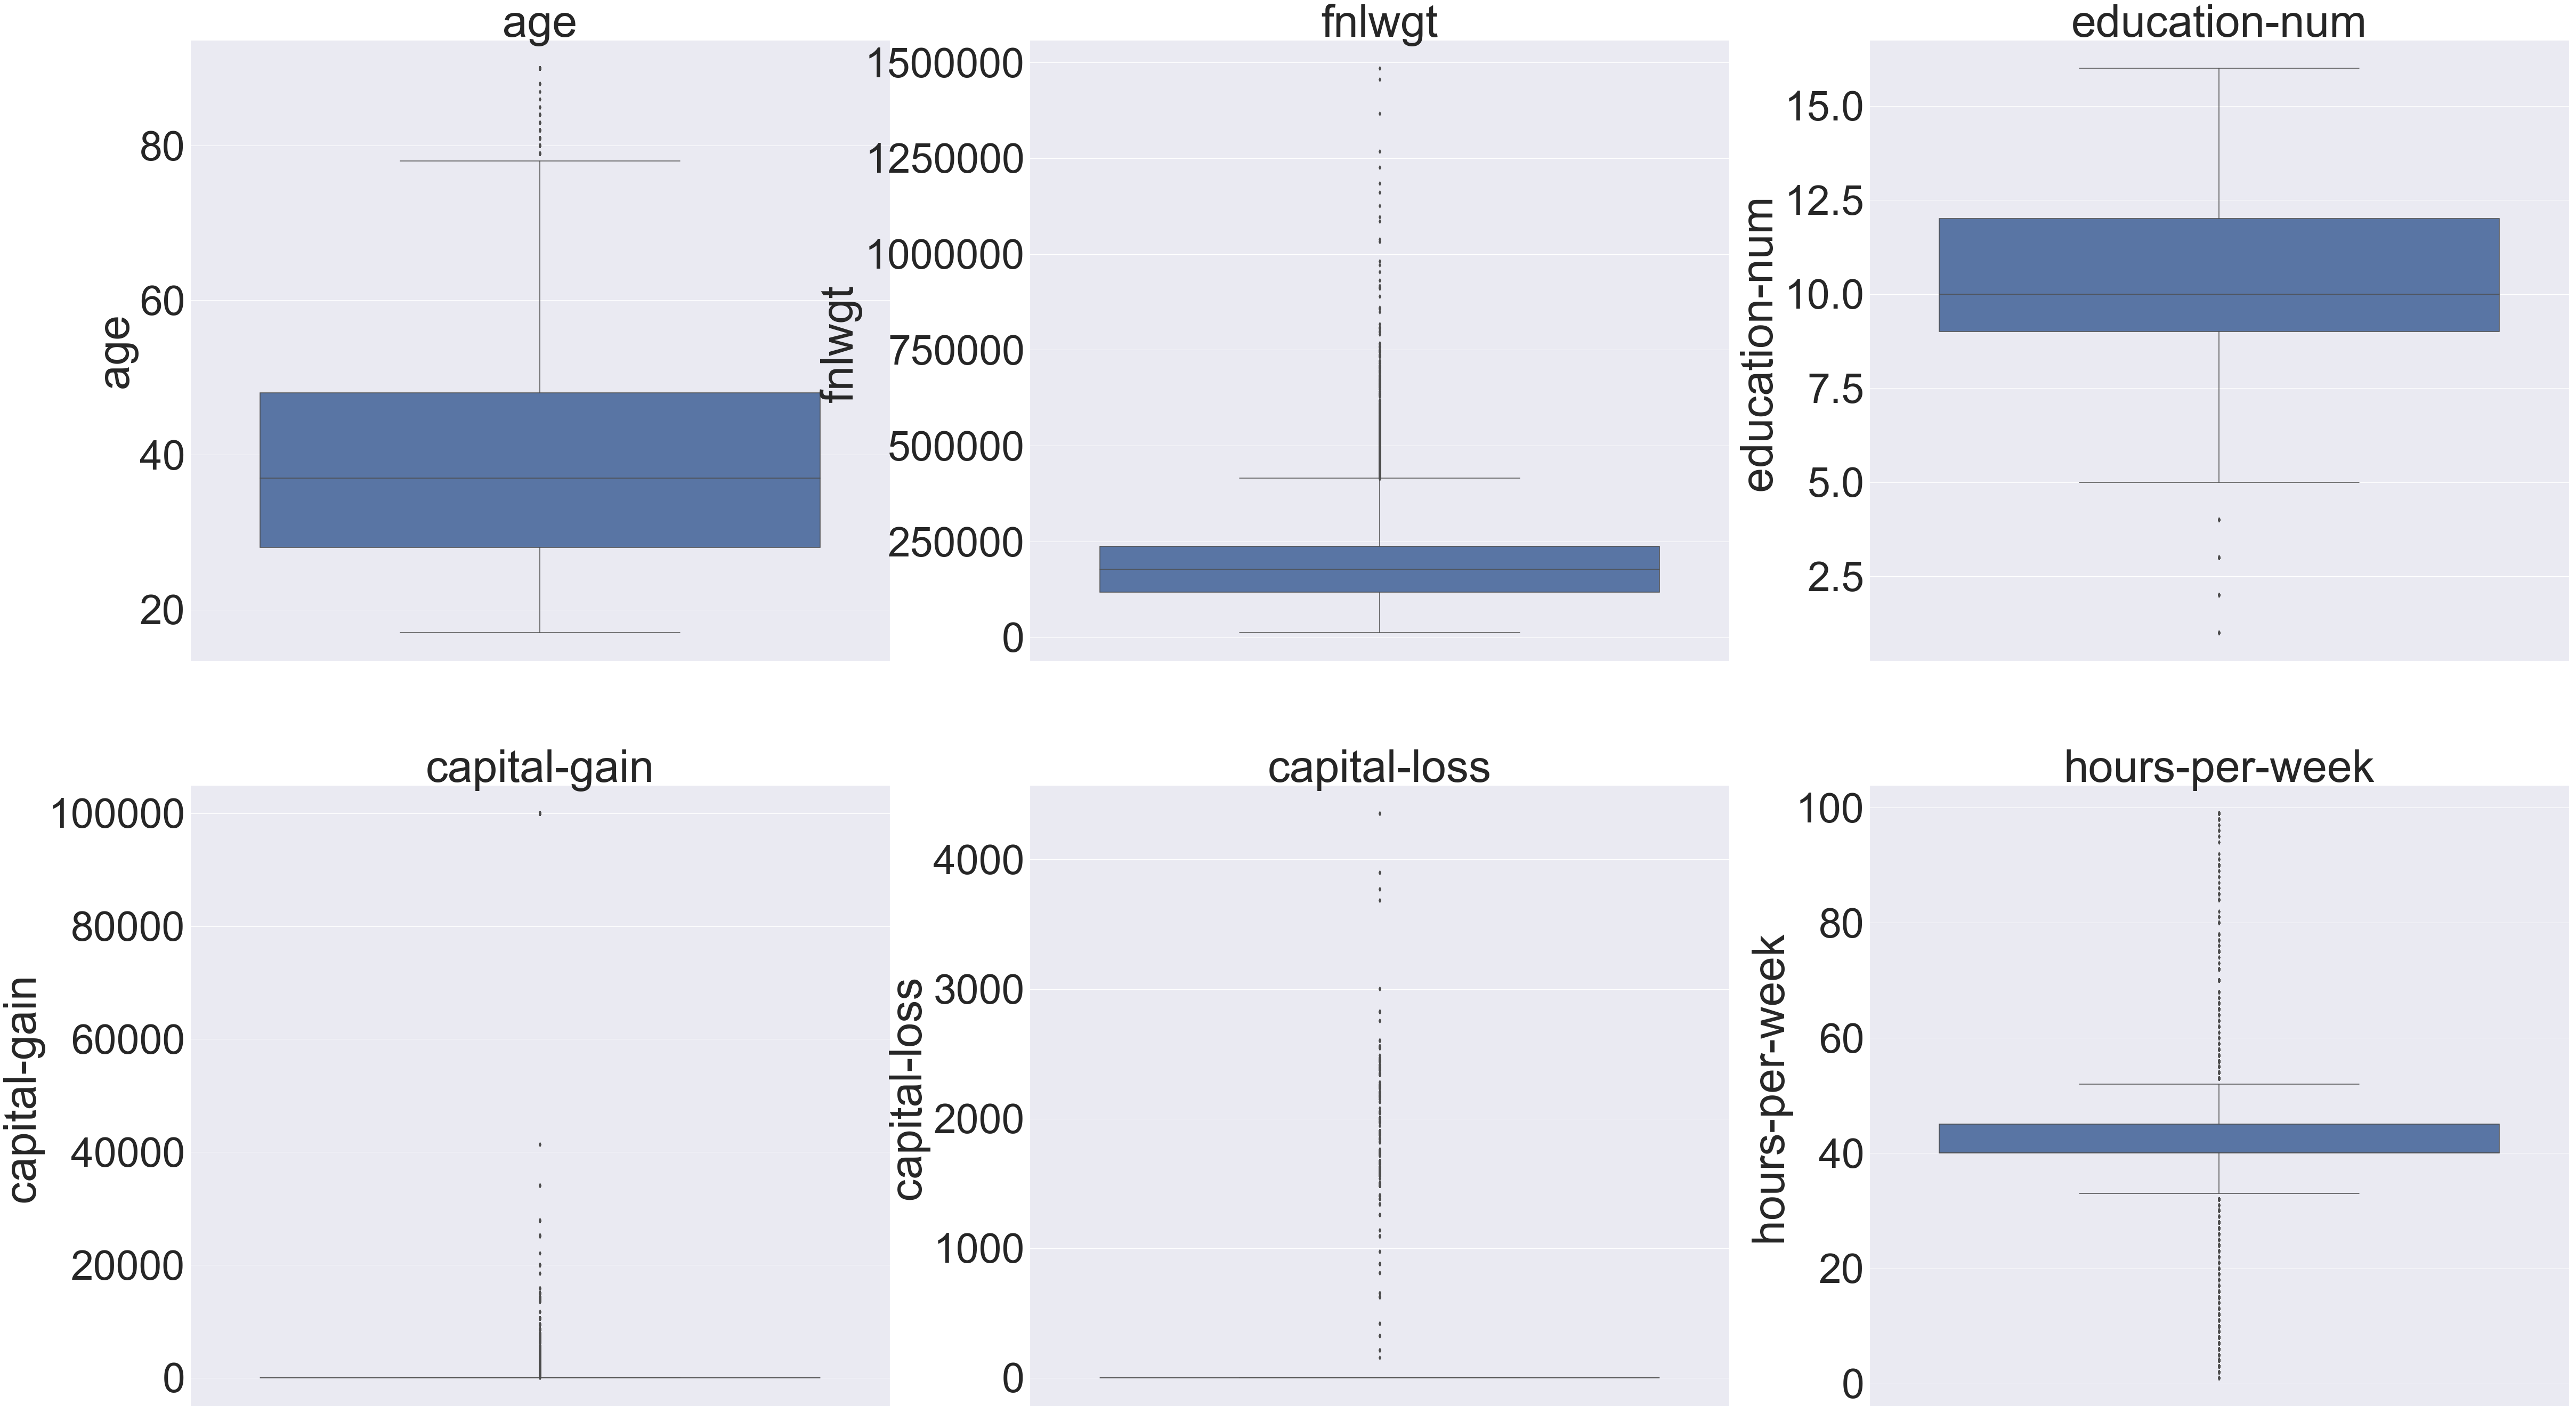

In [517]:
sns.set(font_scale=7)
plt.figure(figsize =(80,150))

plt.subplot(6,3,1)
sns.boxplot(y=dfr['age'])
plt.title('age')

plt.subplot(6,3,2)
sns.boxplot(y=dfr[' fnlwgt'])
plt.title('fnlwgt')

plt.subplot(6,3,3)
sns.boxplot(y=dfr[' education-num'])
plt.title('education-num')

plt.subplot(6,3,4)
sns.boxplot(y=dfr[' capital-gain'])
plt.title('capital-gain')

plt.subplot(6,3,5)
sns.boxplot(y=dfr[' capital-loss'])
plt.title('capital-loss')

plt.subplot(6,3,6)
sns.boxplot(y=dfr[' hours-per-week'])
plt.title('hours-per-week')



# Check Correlation Beetween Independent and Dependent Feature

Text(0.5, 1.0, 'Correlation ')

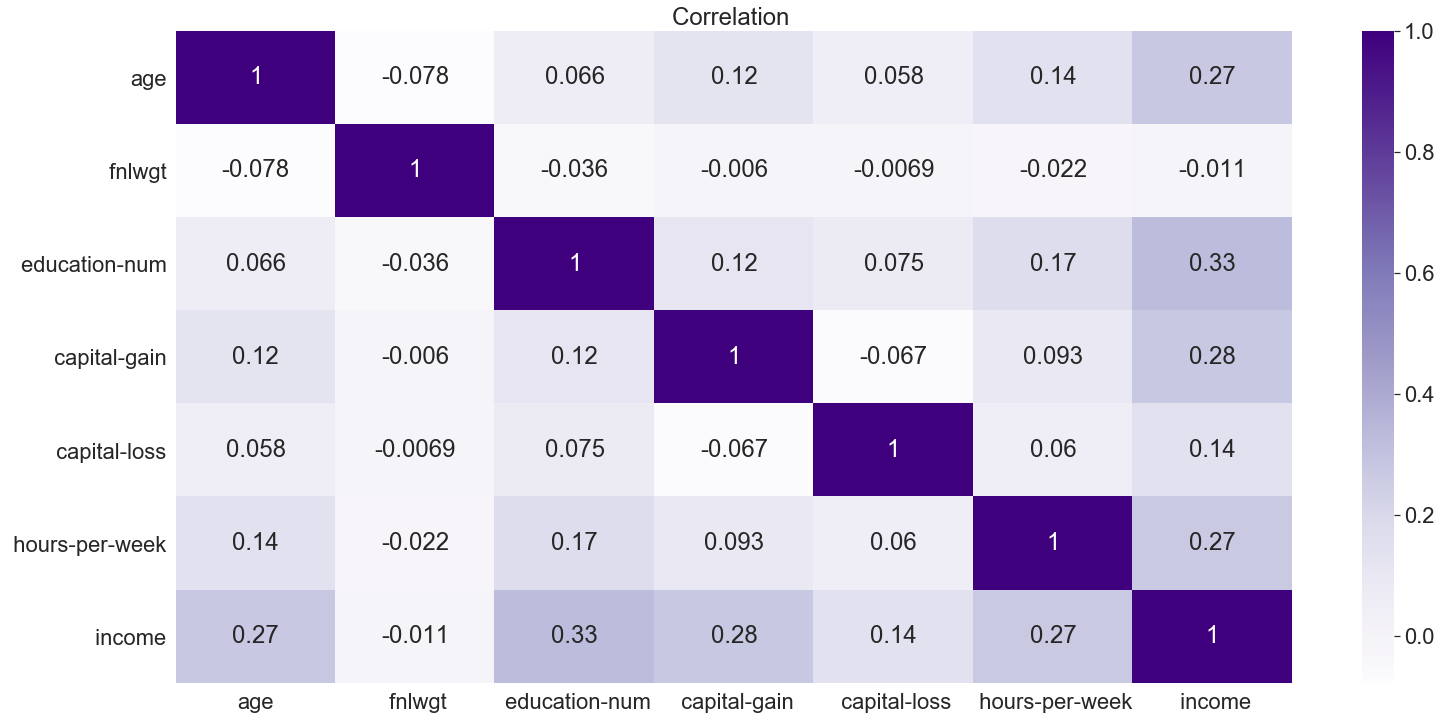

In [560]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(25,12))
hp = sns.heatmap(dfr.corr('spearman'), annot=True, cmap='Purples')
hp.set_title("Correlation ")



Corelation Checking among Categorical and Continuous Data

In [520]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [521]:
feature = []
corrRatio = []
dist = []
skwness = []
kurts = []

from scipy.stats import shapiro, anderson, skew, kurtosis
for i in dfr.select_dtypes(exclude = 'object').columns:
    feature.append(i)
    corrRatio.append(correlation_ratio(dfr[' income'], dfr[i]))
    if shapiro(dfr[i])[1] < 0.05:
        dist.append('Not-Normal Distribution')
    else:
        dist.append('Normal Distribution')

    skwness.append(skew(dfr[i]))
    kurts.append(kurtosis(dfr[i]))



In [552]:
dfr.select_dtypes(exclude = 'object').columns

Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' income'],
      dtype='object')

In [522]:
dfCorRatio = pd.DataFrame()
dfCorRatio['Feature'] = feature
dfCorRatio['Correlation Ratio'] = corrRatio
dfCorRatio['Distribution'] = dist
dfCorRatio['Skewness'] = skwness
dfCorRatio['Kurtosis'] = kurts

dfCorRatio

,Feature,Correlation Ratio,Distribution,Skewness,Kurtosis
0,age,0.234037,Not-Normal Distribution,0.558718,-0.166286
1,fnlwgt,0.009463,Not-Normal Distribution,1.446913,6.217672
2,education-num,0.335154,Not-Normal Distribution,-0.311662,0.623164
3,capital-gain,0.223329,Not-Normal Distribution,11.953297,154.775484
4,capital-loss,0.150526,Not-Normal Distribution,4.594417,20.373489
5,hours-per-week,0.229689,Not-Normal Distribution,0.227632,2.916055
6,income,1.000000,Not-Normal Distribution,1.212374,-0.530148


Corelation Checking among Categorical Data (Dependent Variable to Income)

In [555]:
def cramers_v(x,y):
    import scipy.stats as ss
    confussion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confussion_matrix)[0]
    n = confussion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confussion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [561]:
featurezV = []
corrRatioV = []
lstclm = list(dfr.select_dtypes(exclude = 'int').columns)

for i in lstclm:
    featurezV.append(i)
    corrRatioV.append((i,cramers_v(dfr[' income'], dfr[i])))

    
cramersCRslt = pd.DataFrame(corrRatioV, columns=['Feature','Correlation Ratio'])    

cramersCRslt

,Feature,Correlation Ratio
0,workclass,0.178524
1,education,0.368219
2,marital-status,0.447205
3,occupation,0.351286
4,relationship,0.453423
5,race,0.100203
6,sex,0.215836
7,native-country,0.092107


# Splitting data

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X = dfr.drop([' income'], axis=1)
y = dfr[' income']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 


# Imbalance Data Checking and Handling

In [298]:
dfr[' income'].value_counts()

0    24720
1     7841
Name:  income, dtype: int64

In [299]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel()) 

In [313]:
print('Before Doing Imbalance Handling')
pd.DataFrame(y_train)[' income'].value_counts()

Before Doing Imbalance Handling


0    19802
1     6246
Name:  income, dtype: int64

In [314]:
print('After Doing Imbalance Handling')
pd.DataFrame(y_train_sm)[0].value_counts()

After Doing Imbalance Handling


1    19802
0    19802
Name: 0, dtype: int64

# Machine Learning Model

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef,auc,log_loss
from sklearn import metrics

In [377]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [378]:
train_pred = logmodel.predict(X_train)
test_pred = logmodel.predict(X_test)

In [379]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      4918
           1       0.70      0.28      0.40      1595

    accuracy                           0.79      6513
   macro avg       0.75      0.62      0.64      6513
weighted avg       0.78      0.79      0.76      6513



In [382]:
predictProb = logmodel.predict_proba(X_test)

In [380]:
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)

Text(0.5, 257.44, 'Predicted label')

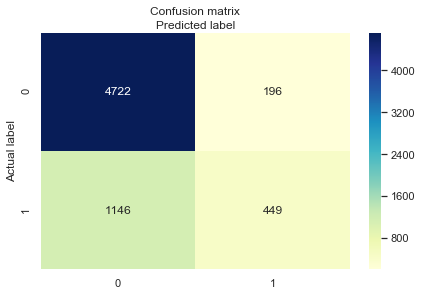

In [381]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Fitting with SMOTE Data

In [386]:
logmodel_sm = LogisticRegression()
logmodel_sm.fit(X_train_sm,y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [387]:
train_pred_sm = logmodel_sm.predict(X_train)
test_pred_sm = logmodel_sm.predict(X_test)

In [388]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4918
           1       0.42      0.66      0.51      1595

    accuracy                           0.69      6513
   macro avg       0.64      0.68      0.64      6513
weighted avg       0.76      0.69      0.71      6513



In [389]:
predictProb_sm = logmodel_sm.predict_proba(X_test)

In [393]:
cnf_matrix_sm = metrics.confusion_matrix(y_test, test_pred_sm)

Text(0.5, 257.44, 'Predicted label')

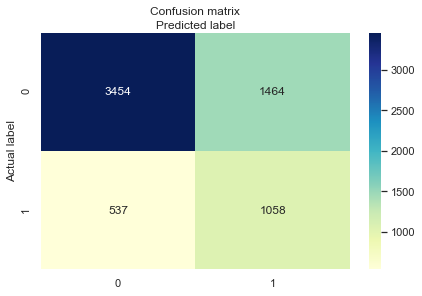

In [394]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_sm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Evaluation

In [341]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score, log_loss, f1_score
from sklearn.model_selection import KFold


In [342]:
kF = KFold(n_splits = 5, shuffle = True)

In [349]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1], multi_class="ovo")
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return { 
        'report': report, 
        'matthew': matt, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss': logloss
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1], multi_class="ovr")
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return { 
        'report': report, 
        'matthew': matt, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss': logloss
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the classification metrics for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [350]:
train_errors = []
validation_errors = []
for train_index, val_index, in kF.split(X, y):
    
    # split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # instantiate model
    logmodel = logmodel
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    # append to appropirate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

/Users/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [351]:
listItem = []
listIndex = []

for i,tr,val in zip(range(1,len(train_errors)+1),train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],
#     listItem.append([tr['accuracy'],val['accuracy'],tr['f1'],
                     val['f1'],tr['matthew'],val['matthew'],tr['logloss'],val['logloss']])
    listIndex.append('{} Iteration'.format(i))

listItem.append(list(np.mean(listItem,axis=0)))
listIndex.append('Average')
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Matthews Corr Coef',
                            'Test Matthews Corr Coef',
                            'Train Log Loss',
                            'Test Log Loss'],
                    index=listIndex)
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.800369,0.795332,0.766773,0.761264,0.644171,0.637707,0.359702,0.348715,0.454064,0.461365
2 Iteration,0.800683,0.792537,0.766139,0.765116,0.643101,0.638477,0.357782,0.349972,0.453823,0.462208
3 Iteration,0.802526,0.803747,0.819380,0.822586,0.666478,0.663277,0.381893,0.373372,0.432982,0.424648
4 Iteration,0.797152,0.805897,0.765275,0.770013,0.640185,0.651811,0.353138,0.367236,0.458497,0.443595
5 Iteration,0.800376,0.794687,0.766125,0.760403,0.644946,0.633445,0.360857,0.341520,0.453227,0.466320
Average,0.800221,0.798440,0.776739,0.775876,0.647776,0.644944,0.362674,0.356163,0.450518,0.451627


In [352]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

<Figure size 3240x3960 with 0 Axes>

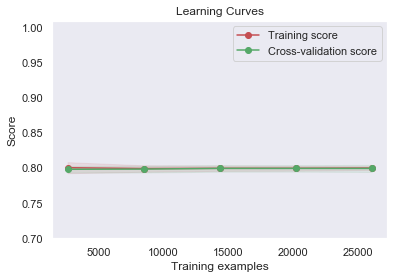

In [353]:
sns.set(font_scale=1)
plt.figure(figsize =(45,55))

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = logmodel
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()